In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL#image library in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='C:\Code_prsnl\dldata',untar = True)

In [3]:
data_dir

'C:\\Code_prsnl\\dldata\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_ph

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

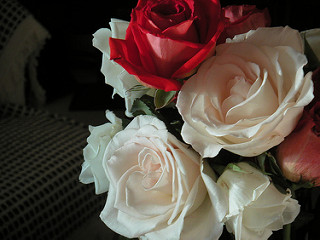

In [9]:
PIL.Image.open(str(roses[1]))

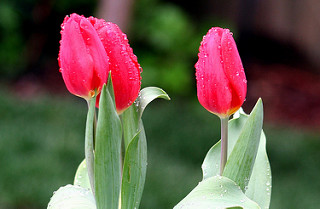

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
#making dictionaries

In [12]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_images_dict['roses']

[WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower

In [14]:
flowers_images_dict['tulips'] # shows all file paths of tulips

[WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Code_prsnl/dldata/datasets/flower_

In [15]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [16]:
#we can use cv2 module to read this img file into opencv module

In [17]:
str(flowers_images_dict['roses'][0])

'C:\\Code_prsnl\\dldata\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print(img.shape)
img

(240, 179, 3)


array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X,y = [],[]

for flower_name,images in flowers_images_dict.items():
    print(flower_name)
    print(images)


roses
[WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('C:/Code_prsnl/dldata/datasets/flower_pho

In [21]:
X,y = [],[]

for flower_name,images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [22]:
X,y = [],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [23]:
y[:5]

[0, 0, 0, 0, 0]

In [24]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [25]:
X=np.array(X)
y=np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
len(X_train)

2569

In [28]:
len(X_test)

1101

In [29]:
#in all image classification cases we have to do scaling 

In [30]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
num_classes=5

model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #until here we have 2d array so we need to convert it to a 1d arrayby flattening
    layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
81/81 [==============================] - 33s 387ms/step - loss: 1.3712 - accuracy: 0.4356
Epoch 2/10
81/81 [==============================] - 31s 383ms/step - loss: 1.0240 - accuracy: 0.5991
Epoch 3/10
81/81 [==============================] - 29s 364ms/step - loss: 0.8462 - accuracy: 0.6769
Epoch 4/10
81/81 [==============================] - 29s 364ms/step - loss: 0.7101 - accuracy: 0.7232
Epoch 5/10
81/81 [==============================] - 30s 372ms/step - loss: 0.4657 - accuracy: 0.8416
Epoch 6/10
81/81 [==============================] - 30s 373ms/step - loss: 0.2986 - accuracy: 0.8992
Epoch 7/10
81/81 [==============================] - 30s 371ms/step - loss: 0.1620 - accuracy: 0.9506
Epoch 8/10
81/81 [==============================] - 31s 378ms/step - loss: 0.1003 - accuracy: 0.9724
Epoch 9/10
81/81 [==============================] - 30s 367ms/step - loss: 0.1192 - accuracy: 0.9646
Epoch 10/10
81/81 [==============================] - 40s 498ms/step - loss: 0.0474 - accura

In [33]:
model.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 6s 143ms/step - loss: 1.7494 - accuracy: 0.6585


[1.7494198083877563, 0.6584922671318054]

In [34]:
predictions=model.predict(X_test_scaled)
predictions

array([[  5.31902   ,  12.205208  ,   7.109291  , -12.070793  ,
         -4.043277  ],
       [ 10.354343  ,   3.322986  ,  -9.962209  ,   0.91410565,
          2.0601625 ],
       [ -2.5053973 ,   1.8377372 ,  17.600649  ,  -7.089     ,
         -1.7955209 ],
       ...,
       [  3.9231677 ,  -8.850991  ,   2.221789  ,   2.505642  ,
         11.652394  ],
       [  4.549282  ,   2.4321954 ,   7.5799136 ,  -5.13845   ,
         -7.5926833 ],
       [ -4.953681  ,  10.672517  ,  11.895039  , -11.331092  ,
          0.68607235]], dtype=float32)

In [35]:
#the above numpy array can be converted into a probability score using softmax

In [36]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0145539e-03, 9.9290705e-01, 6.0782712e-03, 2.8442994e-11,
       8.7152728e-08], dtype=float32)>

In [37]:
np.argmax(np.array([0,78,123,0]))#exaample

2

In [38]:
np.argmax(score)

1

In [39]:
y_test[0]

1

In [40]:
#data augmentation

In [44]:
data_augmentation = keras.Sequential([
    #layers.experimental.preprocessing.RandomZoom(0.9),
    #layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

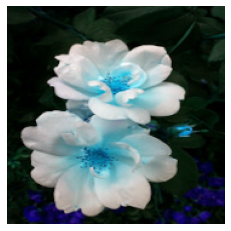

In [45]:
plt.axis('off')
plt.imshow(X[0])

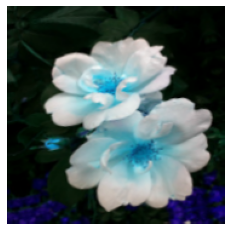

In [46]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [47]:
#now variety of images and data can be produced

In [50]:
num_classes=5

model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    #until here we have 2d array so we need to convert it to a 1d arrayby flattening
    layers.Dropout(0.2),#it will drop 20% of data in each pass for better result
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

#model.fit(X_train_scaled,y_train,epochs=20)


In [51]:
model.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20


NotImplementedError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:827 call
        output = control_flow_util.smart_cond(training, random_rotated_inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:109 smart_cond
        return smart_module.smart_cond(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:822 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:729 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2911 wrapped
        tensor = fun(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2960 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3051 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_6/sequential_3/random_rotation_2/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
